In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math

# %matplotlib notebook
%matplotlib inline

PI = math.pi

In [17]:
def lu_dec(A):
    """
    Функция LU разложения матрицы
    :param A: Матрица, которую нужно разложить
    :return L, U: Мтарицы L, U
    """
    n = len(A)
    L = [[1 if i == j else 0 for i in range(n)] for j in range(n)]
    U = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            if i <= j:
                U[i][j] = A[i][j] - sum([L[i][k] * U[k][j] for k in range(i)])
            else:
                L[i][j] = (A[i][j] - sum([L[i][k] * U[k][j] for k in range(j)])) / U[j][j]

    return L, U


def decision(arr, b=None):
    """
    Решение СЛАУ методом LU разложения
    :param arr: A|B
    :return x:
    """
    n = len(arr)
    if b is None:
        A = [[arr[i][j] for j in range(len(arr[i]) - 1)] for i in range(len(arr))]
        b = [arr[i][len(A[0])] for i in range(n)]
    else:
        A = arr

    L, U = lu_dec(A)

    # L * y  = b
    y = [0 for i in range(n)]
    for i in range(n):
        y[i] = (b[i] - sum([L[i][k] * y[k] for k in range(i)]))

    x = [0 for i in range(n)]

    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - sum([U[i][k] * x[k] for k in range(i + 1, n)])) / U[i][i]

    return x

# Метод квадратур

In [60]:
def volt_2_rect(K, f, a, b, h):
    """
    Метод квадратур
    
    :param K: Ядро уравнения
    :param f: Правая  часть (задаются аналитически)
    :param a: Начало отрезка интегрирования
    :param b: Конец отрезка
    :param h: Шаг сетки
    :return: Вектор y приближений к  решению в узлах сетки
    """
    x = np.arange(a, b, h)
    n = len(x)
    y = [f(x[0])]
    for i in range(1, n):
        s = 0
        for j in range(1, i):
            s += h * K(x[i], x[j]) * y[j]
        
        tmp = (f(x[i]) + h/2 * K(x[i], x[0]) * y[0] + h*s)/(1 - h/2 * K(x[i], x[i]))
        y.append(tmp)
        
    print(y)
        
    return y
    

In [61]:
K = lambda x, s: math.exp(-(x - s))
f = lambda x: math.exp(-x)
a = 0
b = 1
h = 0.1
ans = volt_2_rect(K, f, a, b, h)


y = lambda x: 1

0
0.09049129376125062
0.16462171097808148
0.22461184567499853
0.27241414070594666
0.30974327283601266
0.338103229489648
0.35881142768978913
0.3730201892986138
[1.0, 1.0000834620397447, 0.9144383369557958, 0.8361276871722231, 0.7645234030578119, 0.6990511650198524, 0.6391858370340305, 0.5844472546630998, 0.5343963737811175, 0.4886317491131479]


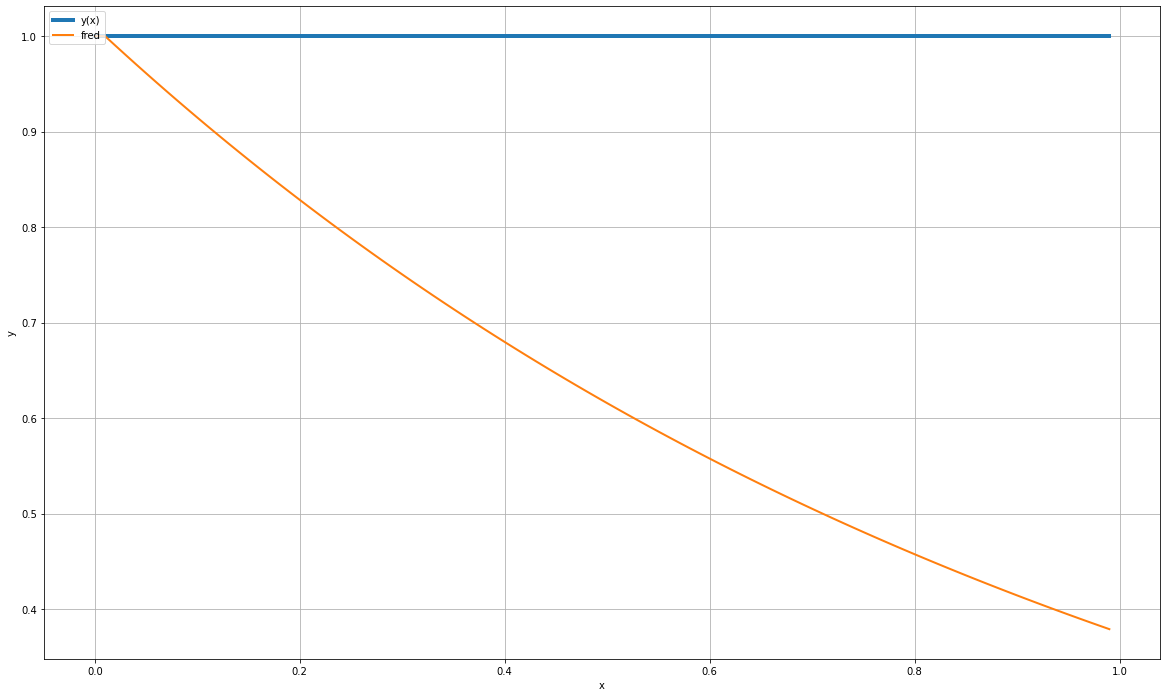

In [56]:
x_list = list(np.arange(a, b, h))

y_list = [y(x) for x in x_list]

plt.figure(figsize=(20, 12))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_list, y_list, label="y(x)", linewidth=4)
plt.plot(x_list, ans, label="fred", linewidth=2)
plt.legend(loc=2)
None